# Analyse en Composantes Principales

Dans ce notebook, nous allons réaliser une ACP (analyse en composantes principales) sous Python à l'aide du package `scikit-learn`.

Répondez aux questions en ajoutant des cellules après les questions. Il y a 2 types de questions:
- <span>&#9757;</span> Question où la réponse attendue est une cellule de Code
- <span>&#9999;</span> Question où la réponse attendue est une cellule de type Markdown avec une phrase réponse (les réponses à ces questions doivent être justifiées)

N'hésitez pas à mettre des commentaires dans votre code ou à en rajouter dans le code déjà présent dans le notebook.

## 1. Données

Les données viennent d'un ouvrage de Gilbert Saporta. Il s'agit de l’étude des différents postes du budget de l’état français de 1872 à 1971. Les valeurs sont données en pourcentage du budget global pour éliminer l’effet de l’évolution de la valeur du franc nominal au cours du temps. Les intitulés complets des variables
sont : 
- PVP : Pouvoirs publics,
- AGR : Agriculture,
- CMI : Commerce et industrie,
- TRA : Travail,
- LOG : Logement,
- EDU : éducation,
- ACS : Action sociale,
- ANC : Anciens combattants,
- DEF : Défense,
- DET : Remboursement de la dette,
- DIV : Divers.

### 1.1 Importation des données

Dans un premier temps, nous importons le tableau des individus et variables $X=(x_i^j)_{i=1,\ldots,n;j = 1,\ldots,p}$, où $n$ est le nombre d’observations et $p$ le nombre de variables. Nous utilisons la librairie `Pandas` et la fonction `read_excel()`. 

<span>&#9757;</span> Importer les données avec la commande suivante en leur donnant le nom que vous souhaitez et les visualiser.

In [1]:
import pandas as pd
import numpy as np 

X = pd.read_excel("budgets.xls",sheet_name=0,header=0,index_col=0)

Nous remarquons que :
* Les données actives sont situées dans la première feuille (`sheet_name = 0`) ;
* La première ligne correspond aux noms des variables (`header = 0`)
* La première colonne aux identifiants des observations (`index_col = 0`).

<span>&#9999;</span> A quoi servent les librairies pandas et numpy ?


* Pandas est une librairie python qui permet de manipuler facilement des données à analyser
  manipuler des tableaux de données avec des étiquettes de variables (colonnes) et individus (lignes);
  ces tableaux sont appelés DataFrames
* NumPy est très utile pour effectuer des calculs logiques et mathématiques sur des tableaux et des matrices. Cet outil permet d'effectuer ces opérations bien plus rapidement et efficacement que les listes Python.

<span>&#9757;</span> Afficher vos données et vérifier le type de **X**. 

In [2]:
X

,PVP,AGR,CMI,TRA,LOG,EDU,ACS,ANC,DEF,DET,DIV
AN,,,,,,,,,,,
1872,18.0,0.5,0.1,6.7,0.5,2.1,2.0,0.0,26.4,41.5,2.1
1880,14.1,0.8,0.1,15.3,1.9,3.7,0.5,0.0,29.8,31.3,2.5
1890,13.6,0.7,0.7,6.8,0.6,7.1,0.7,0.0,33.8,34.4,1.7
1900,14.3,1.7,1.7,6.9,1.2,7.4,0.8,0.0,37.7,26.2,2.2
1903,10.3,1.5,0.4,9.3,0.6,8.5,0.9,0.0,38.4,27.2,3.0
1906,13.4,1.4,0.5,8.1,0.7,8.6,1.8,0.0,38.5,25.3,1.9
1909,13.5,1.1,0.5,9.0,0.6,9.0,3.4,0.0,36.8,23.5,2.6
1912,12.9,1.4,0.3,9.4,0.6,9.3,4.3,0.0,41.1,19.4,1.3
1920,12.3,0.3,0.1,11.9,2.4,3.7,1.7,1.9,42.4,23.1,0.2


In [3]:
X.dtypes #type de X

PVP     float64
AGR     float64
 CMI    float64
TRA     float64
LOG     float64
 EDU    float64
ACS     float64
 ANC    float64
DEF     float64
DET     float64
 DIV    float64
dtype: object

Les questions suivantes sont faites pour maniuler un peu ce type. <span>&#9757;</span>Vérifier qu'il y a le bon nombre de variables et d'individus. N'hésitez pas à consulter https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html en cas de besoin.

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 1872 to 1971
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PVP     24 non-null     float64
 1   AGR     24 non-null     float64
 2    CMI    24 non-null     float64
 3   TRA     24 non-null     float64
 4   LOG     24 non-null     float64
 5    EDU    24 non-null     float64
 6   ACS     24 non-null     float64
 7    ANC    24 non-null     float64
 8   DEF     24 non-null     float64
 9   DET     24 non-null     float64
 10   DIV    24 non-null     float64
dtypes: float64(11)
memory usage: 2.2 KB


<span>&#9757;</span>Nommer (en créant des variables) **n** le nombre d'individus et **p** le nombre de variables. Ces quantités seront utiles pour la suite.


In [5]:
#X.shape

In [6]:
n = 24
p = 11

In [7]:
X.values

array([[18. ,  0.5,  0.1,  6.7,  0.5,  2.1,  2. ,  0. , 26.4, 41.5,  2.1],
       [14.1,  0.8,  0.1, 15.3,  1.9,  3.7,  0.5,  0. , 29.8, 31.3,  2.5],
       [13.6,  0.7,  0.7,  6.8,  0.6,  7.1,  0.7,  0. , 33.8, 34.4,  1.7],
       [14.3,  1.7,  1.7,  6.9,  1.2,  7.4,  0.8,  0. , 37.7, 26.2,  2.2],
       [10.3,  1.5,  0.4,  9.3,  0.6,  8.5,  0.9,  0. , 38.4, 27.2,  3. ],
       [13.4,  1.4,  0.5,  8.1,  0.7,  8.6,  1.8,  0. , 38.5, 25.3,  1.9],
       [13.5,  1.1,  0.5,  9. ,  0.6,  9. ,  3.4,  0. , 36.8, 23.5,  2.6],
       [12.9,  1.4,  0.3,  9.4,  0.6,  9.3,  4.3,  0. , 41.1, 19.4,  1.3],
       [12.3,  0.3,  0.1, 11.9,  2.4,  3.7,  1.7,  1.9, 42.4, 23.1,  0.2],
       [ 7.6,  1.2,  3.2,  5.1,  0.6,  5.6,  1.8, 10. , 29. , 35. ,  0.9],
       [10.5,  0.3,  0.4,  4.5,  1.8,  6.6,  2.1, 10.1, 19.9, 41.6,  2.3],
       [10. ,  0.6,  0.6,  9. ,  1. ,  8.1,  3.2, 11.8, 28. , 25.8,  2. ],
       [10.6,  0.8,  0.3,  8.9,  3. , 10. ,  6.4, 13.4, 27.4, 19.2,  0. ],
       [ 8.8,  2.6,  1.4,

<span>&#9757;</span> Afficher uniquement la variable Travail. Afficher uniquement l'individu 1923. Afficher uniquement le 4ème individu de la liste


In [8]:
X['TRA'] # Afficher uniquement la variable Travail

 AN
1872     6.7
1880    15.3
1890     6.8
1900     6.9
1903     9.3
1906     8.1
1909     9.0
1912     9.4
1920    11.9
1923     5.1
1926     4.5
1929     9.0
1932     8.9
1935     7.8
1938     5.9
1947    11.4
1950    12.4
1953     7.9
1956     7.6
1959     5.7
1962     6.6
1965     9.1
1968     5.9
1971     8.5
Name: TRA, dtype: float64

In [9]:
X.loc[1923] # Afficher uniquement l'individu 1923

PVP      7.6
AGR      1.2
 CMI     3.2
TRA      5.1
LOG      0.6
 EDU     5.6
ACS      1.8
 ANC    10.0
DEF     29.0
DET     35.0
 DIV     0.9
Name: 1923, dtype: float64

In [10]:
X.at[1923, 'TRA'] 

5.1

In [11]:
X.iloc[3] #Afficher uniquement le 4ème individu de la liste

PVP     14.3
AGR      1.7
 CMI     1.7
TRA      6.9
LOG      1.2
 EDU     7.4
ACS      0.8
 ANC     0.0
DEF     37.7
DET     26.2
 DIV     2.2
Name: 1900, dtype: float64

In [12]:
X.index[3] #Afficher le nom du 4iem individu

1900

### 1.2 Indicateurs statistiques

<span>&#9757;</span>Afficher les indicateurs statistiques de bases: moyennes, écart-types, médianes...

In [13]:
X.describe()

,PVP,AGR,CMI,TRA,LOG,EDU,ACS,ANC,DEF,DET,DIV
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,12.212500,1.995833,3.941667,8.320833,3.958333,9.941667,4.816667,4.275000,30.258333,19.141667,1.183333
std,2.238267,1.681221,4.585603,2.520866,4.271841,5.335600,3.482087,4.244203,7.466733,12.455972,1.047841
min,7.600000,0.300000,0.100000,4.500000,0.500000,2.100000,0.500000,0.000000,18.800000,3.500000,0.000000
25%,10.575000,0.800000,0.400000,6.675000,0.675000,7.325000,1.800000,0.000000,25.925000,6.350000,0.000000
50%,12.600000,1.400000,1.300000,8.000000,1.850000,8.700000,4.550000,3.800000,29.150000,19.300000,1.400000
75%,13.425000,2.650000,7.350000,9.150000,6.200000,10.600000,6.800000,5.450000,37.025000,26.450000,2.025000
max,18.000000,6.000000,16.500000,15.300000,15.800000,23.800000,11.300000,13.400000,42.400000,41.600000,3.000000


<span>&#9999;</span> Quelle est la variable la plus dispersée? Quelle est la variable qui prend les valeurs les plus importantes?

**La variable la plus disperser est Remboursement de la dette (DET) car sont intervalle interquartille est [3,5 ; 41,6]
donc les individus sont très disperser autour de la moyenne. 
La variable qui prend les valeurs les plus importantes est  Défense (DEF) avec un intervalle interquartille compris entre [18,8 ; 42,4]**

<span>&#9999;</span> Pensez vous qu'il faut travailler avec les variables réduites?

**Le principal avantage de travailler avec les variables réduites est de rendre comparables des variables qui ne
le seraient pas directement parce quelles ont des moyennes et ou des variances trop différentes.**
 
 NON Parcequil ont la même unité

<span>&#10057;</span>  Attention, `X.var()` donne la variance corrigée (et donc `X.std()` l'ecart-typé corrigé). Si on veut la vraie variance, on peut utiliser la commande de numpy: `np.std(X)`. Pour la matrice de covariance, `X.cov()` et `np.cov()` donnent les covariances corrigées. Pour obtenir la vraie matrice de covariance, on doit la décorriger à la main en multipliant par $\frac{n-1}{n}$.

<span>&#9757;</span> Calculer l'inertie du nuage de points.

In [47]:
x_var_corr=X.var()*(n-1)/n

print(x_var_corr)

inertie=sum(x_var_corr)
inertie

PVP       4.801094
AGR       2.708733
 CMI     20.151597
TRA       6.089983
LOG      17.488264
 EDU     27.282431
ACS      11.619722
 ANC     17.262708
DEF      53.429097
DET     148.686597
 DIV      1.052222
dtype: float64


310.57244791666665

<span>&#9757;</span> Créer une variable contenant la vraie matrice de covariance (qui servira par la suite). Vérifier que sa trace vaut bien l'intertie. 

In [15]:
matrice_cov=X.cov()*(n-1)/n
matrice_cov

,PVP,AGR,CMI,TRA,LOG,EDU,ACS,ANC,DEF,DET,DIV
PVP,4.801094,-0.304948,-0.003854,1.258490,0.326354,-1.717187,-0.981458,-6.253438,1.618438,0.896562,0.335625
AGR,-0.304948,2.708733,4.433924,-1.120330,2.998993,6.286840,4.520069,0.302813,-5.393924,-13.946076,-0.467986
CMI,-0.003854,4.433924,20.151597,1.029965,16.727153,10.951181,9.505556,0.419792,-17.599097,-44.020903,-1.602639
TRA,1.258490,-1.120330,1.029965,6.089983,1.714201,-2.747535,-1.708264,-3.211562,2.849618,-4.463785,0.289514
LOG,0.326354,2.998993,16.727153,1.714201,17.488264,5.075486,6.953194,0.776875,-11.571736,-38.654514,-1.878611
EDU,-1.717187,6.286840,10.951181,-2.747535,5.075486,27.282431,15.578889,3.406458,-20.008264,-42.688819,-1.332222
ACS,-0.981458,4.520069,9.505556,-1.708264,6.953194,15.578889,11.619722,4.081667,-14.131389,-33.593194,-1.851806
ANC,-6.253438,0.302813,0.419792,-3.211562,0.776875,3.406458,4.081667,17.262708,-12.659792,-2.501042,-1.608750
DEF,1.618438,-5.393924,-17.599097,2.849618,-11.571736,-20.008264,-14.131389,-12.659792,53.429097,23.319653,0.153056
DET,0.896562,-13.946076,-44.020903,-4.463785,-38.654514,-42.688819,-33.593194,-2.501042,23.319653,148.686597,6.928611


In [16]:
np.trace(matrice_cov)

310.5724479166667

<span>&#9757;</span>Affchier la matrice de corrélation.

In [17]:
X.corr()

,PVP,AGR,CMI,TRA,LOG,EDU,ACS,ANC,DEF,DET,DIV
PVP,1.000000,-0.084561,-0.000392,0.232740,0.035616,-0.150040,-0.131403,-0.686901,0.101050,0.033556,0.149324
AGR,-0.084561,1.000000,0.600137,-0.275838,0.435732,0.731321,0.805683,0.044283,-0.448366,-0.694917,-0.277202
CMI,-0.000392,0.600137,1.000000,0.092974,0.891033,0.467051,0.621191,0.022507,-0.536348,-0.804208,-0.348038
TRA,0.232740,-0.275838,0.092974,1.000000,0.166104,-0.213154,-0.203072,-0.313223,0.157975,-0.148340,0.114369
LOG,0.035616,0.435732,0.891033,0.166104,1.000000,0.232361,0.487768,0.044712,-0.378561,-0.758038,-0.437935
EDU,-0.150040,0.731321,0.467051,-0.213154,0.232361,1.000000,0.874978,0.156967,-0.524058,-0.670250,-0.248646
ACS,-0.131403,0.805683,0.621191,-0.203072,0.487768,0.874978,1.000000,0.288194,-0.567150,-0.808198,-0.529595
ANC,-0.686901,0.044283,0.022507,-0.313223,0.044712,0.156967,0.288194,1.000000,-0.416853,-0.049366,-0.377468
DEF,0.101050,-0.448366,-0.536348,0.157975,-0.378561,-0.524058,-0.567150,-0.416853,1.000000,0.261636,0.020413
DET,0.033556,-0.694917,-0.804208,-0.148340,-0.758038,-0.670250,-0.808198,-0.049366,0.261636,1.000000,0.553932


<span>&#9999;</span> Donner des exemples de variables linéairement corrélés (positivement et négativement) et de variables linéairement indépendantes.

- **LOG et CMI sont linéairement corrélés positivement;**
- **EDU et DET sont linéairement corrélés négativement;**
- **DIV et DEF sont linéairement indépendantes.**

### 1.3 Centrage-Réduction

Dans cet exemple, on va préférer ne pas réduire nos données. Néanmoins, c'est tres souvent utile. 
On peut pour cela utiliser la classe `StandardScaler` de scikit learn. 

Nous instancions l’objet et nous l’appliquons sur la matrice $X$. Nous obtenons une matrice $Z$ telle que
$$z_{i,j}=\frac{x_{i,j}-\bar{x}_j}{s_j}$$
où $\bar{x}_j=\frac1n\sum_{i=1}^nx_{i,j}$ est la moyenne de la variable $V_j$ et $s_j=\sqrt{\frac1n\sum_{i=1}^n\left(x_{ij}-\bar{x}_j\right)^2}$ son écart-type.

In [18]:
#scikit-learn
import sklearn as sl

#classe pour standardisation
from sklearn.preprocessing import StandardScaler

#instanciation
sc = StandardScaler()

#transformation – centrage-réduction
Z = sc.fit_transform(X)
pd.DataFrame(Z)

,0,1,2,3,4,5,6,7,8,9,10
0,2.641319,-0.908867,-0.855786,-0.656796,-0.826977,-1.501298,-0.826300,-1.028920,-0.527850,1.833595,0.893630
1,0.861424,-0.726587,-0.855786,2.828105,-0.492201,-1.194976,-1.266341,-1.028920,-0.062704,0.997099,1.283578
2,0.633232,-0.787347,-0.722127,-0.616274,-0.803065,-0.544041,-1.207669,-1.028920,0.484528,1.251328,0.503682
3,0.952700,-0.179748,-0.499363,-0.575752,-0.659589,-0.486606,-1.178333,-1.028920,1.018079,0.578850,0.991117
4,-0.872833,-0.301268,-0.788956,0.396779,-0.803065,-0.276009,-1.148997,-1.028920,1.113844,0.660860,1.771012
5,0.541955,-0.362028,-0.766680,-0.089486,-0.779152,-0.256864,-0.884972,-1.028920,1.127525,0.505042,0.698656
6,0.587594,-0.544307,-0.766680,0.275213,-0.803065,-0.180283,-0.415595,-1.028920,0.894951,0.357425,1.381064
7,0.313764,-0.362028,-0.811233,0.437301,-0.803065,-0.122848,-0.151570,-1.028920,1.483225,0.021186,0.113735
8,0.039934,-1.030386,-0.855786,1.450354,-0.372638,-1.194976,-0.914308,-0.571622,1.661076,0.324621,-0.958621
9,-2.105069,-0.483547,-0.165217,-1.305149,-0.803065,-0.831218,-0.884972,1.377911,-0.172150,1.300534,-0.276213


<span>&#10057;</span> Remarque: 
- Scikit-learn manipule des numpy.ndarray et non des `pandas.DataFrame`. On peut très bien appliquer les fonctions de Scikit-learn à un DataFrame mais la sortie sera de type `numpy.ndarray`. Si on veut retrouver un DataFrame, on doit effectuer une transformation grâce à `pd.DataFrame`.
- La fonction précédente centre et réduit au sens de numpy (donc non corrigé). 
- Après la transformation précédente, on a perdu le nom des variables et des individus.

<span>&#9757;</span> Vérifier les remarques ci-dessus.

In [19]:
type(Z)

numpy.ndarray

In [20]:
np.var(Z, axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [21]:
Z

array([[ 2.64131934, -0.90886658, -0.85578554, -0.65679575, -0.82697713,
        -1.5012978 , -0.82629967, -1.0289201 , -0.52785037,  1.83359542,
         0.89362993],
       [ 0.8614238 , -0.72658694, -0.85578554,  2.82810508, -0.49220085,
        -1.19497561, -1.26634092, -1.0289201 , -0.06270361,  0.99709866,
         1.28357753],
       [ 0.63323207, -0.78734682, -0.72212706, -0.61627364, -0.80306454,
        -0.54404097, -1.20766875, -1.0289201 ,  0.48452787,  1.25132807,
         0.50368232],
       [ 0.9527005 , -0.17974799, -0.49936293, -0.57575154, -0.65958899,
        -0.48660556, -1.17833267, -1.0289201 ,  1.01807857,  0.57885029,
         0.99111683],
       [-0.87283339, -0.30126775, -0.7889563 ,  0.39677892, -0.80306454,
        -0.27600905, -1.14899659, -1.0289201 ,  1.11384408,  0.66085977,
         1.77101204],
       [ 0.54195537, -0.36202764, -0.76667988, -0.08948631, -0.77915195,
        -0.25686392, -0.88497184, -1.0289201 ,  1.12752486,  0.50504175,
         0.698

In [22]:
Z.dtype

dtype('float64')

In [23]:
Z.mean()

-3.364312195833808e-17

### 1.4 Distance entre les points

On rappelle que la distance (euclidienne au carré) entre 2 individus $i$ et $j$ vaut:

$$d^2(i,j)=\sum_{k=1}^p (x_{ik}-x_{jk})^2.$$

<span>&#9757;</span> Coder une fonction pour afficher les distances entre individus (sous forme de tableau n x n )

In [24]:
def distance_indiv(df):
    distance_indiv = np.zeros((n,n))
    
    for i in range(n):
        for j in range (n):
            distance_indiv [i,j] = sum (df.iloc[i] - df.iloc[j])**2
            
    distance_indiv = pd.DataFrame(distance_indiv, index=df.index, columns=df.index) 
    return distance_indiv 


In [25]:
distance_indiv(X)

AN,1872,1880,1890,1900,1903,1906,1909,1912,1920,1923,...,1938,1947,1950,1953,1956,1959,1962,1965,1968,1971
AN,,,,,,,,,,,,,,,,,,,,,
1872,0.00,1.000000e-02,4.000000e-02,4.000000e-02,4.000000e-02,0.09,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,...,1.000000e-02,4.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,4.000000e-02,4.000000e-02,4.000000e-02,1.000000e-02
1880,0.01,0.000000e+00,1.000000e-02,1.000000e-02,1.000000e-02,0.04,2.386304e-29,4.437343e-31,7.888609e-31,4.930381e-30,...,0.000000e+00,1.000000e-02,5.048710e-29,1.262177e-29,5.048710e-29,1.262177e-29,1.000000e-02,1.000000e-02,1.000000e-02,5.048710e-29
1890,0.04,1.000000e-02,0.000000e+00,8.287970e-29,2.174298e-29,0.01,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,...,1.000000e-02,9.984021e-29,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,2.415887e-30,8.697191e-29,1.282392e-28,1.000000e-02
1900,0.04,1.000000e-02,8.287970e-29,0.000000e+00,1.972152e-29,0.01,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,...,1.000000e-02,1.972152e-29,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,3.332937e-29,2.415887e-30,1.597443e-29,1.000000e-02
1903,0.04,1.000000e-02,2.174298e-29,1.972152e-29,0.000000e+00,0.01,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,...,1.000000e-02,1.262177e-29,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.774937e-30,8.332343e-30,7.119470e-29,1.000000e-02
1906,0.09,4.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,0.00,4.000000e-02,4.000000e-02,4.000000e-02,4.000000e-02,...,4.000000e-02,1.000000e-02,4.000000e-02,4.000000e-02,4.000000e-02,4.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,4.000000e-02
1909,0.01,2.386304e-29,1.000000e-02,1.000000e-02,1.000000e-02,0.04,0.000000e+00,1.779867e-29,1.262177e-29,7.888609e-31,...,2.386304e-29,1.000000e-02,1.774937e-30,2.386304e-29,1.774937e-30,2.386304e-29,1.000000e-02,1.000000e-02,1.000000e-02,7.119470e-29
1912,0.01,4.437343e-31,1.000000e-02,1.000000e-02,1.000000e-02,0.04,1.779867e-29,0.000000e+00,0.000000e+00,2.083086e-30,...,4.437343e-31,1.000000e-02,8.332343e-30,4.437343e-31,8.332343e-30,8.332343e-30,1.000000e-02,1.000000e-02,1.000000e-02,1.779867e-29
1920,0.01,7.888609e-31,1.000000e-02,1.000000e-02,1.000000e-02,0.04,1.262177e-29,0.000000e+00,0.000000e+00,1.232595e-30,...,1.112417e-30,1.000000e-02,1.779867e-29,5.207715e-31,1.827014e-29,8.014950e-30,1.000000e-02,1.000000e-02,1.000000e-02,8.014950e-30


<span>&#9999;</span> Donner 2 années qui se ressemblent beaucoup et 2 années qui sont très différentes du point de vue des variables

**Deux années qui se resemble beaucoup:**
    
    1880 et 1938
    1912 et 1920
    
**Deux années qui sont très différente:**
    
    1890 et 1956
    1953 et 1923
    

<span>&#9757;</span> Déterminer les coordonnées du centre de gravité du nuage de points

In [26]:
G= X.mean()
G

PVP     12.212500
AGR      1.995833
 CMI     3.941667
TRA      8.320833
LOG      3.958333
 EDU     9.941667
ACS      4.816667
 ANC     4.275000
DEF     30.258333
DET     19.141667
 DIV     1.183333
dtype: float64

<span>&#9757;</span> Calculer (et stocker) les distances de chaque individu au centre de gravité (on pourra  d'abord créer un nouveau DataFrame centré C). Ces quantités représentent les **contributions des individus à l'inertie totale**. 

In [27]:
distance_G = np.sum((X-G)**2, axis=1)
distance_G = pd.DataFrame({'distance_G':distance_G})
distance_G

,distance_G
AN,
1872,668.401302
1880,298.332969
1890,316.628802
1900,166.198802
1903,198.902135
1906,159.815469
1909,111.009635
1912,163.108802
1920,251.248802


<span>&#9757;</span> Retrouver par un calcul différent du précédent l'inertie totale. 

In [28]:
inertie_total = np.mean(distance_G)
inertie_total
# distance_G.mean

distance_G    310.572448
dtype: float64

<span>&#9999;</span> Quelles sont les années qui se démarquent?

-**1872**

-**1926**

-**1950**

## 2. Analyse en composantes principales à la main

### 2.1 Valeurs propres et vecteurs propres

<span>&#9757;</span>  A l'aide de la fonction `linalg.eig` de numpy, récuperer les valeurs propres et vecteurs propres de la (vraie) matrice de covariance.

In [29]:
val_propre= np.linalg.eigh(matrice_cov)
val_propre

(array([1.27864694e-04, 2.47817424e-01, 6.31795526e-01, 1.07210254e+00,
        1.11128020e+00, 3.07770050e+00, 5.52199853e+00, 1.64022084e+01,
        2.19686678e+01, 5.58215593e+01, 2.04717190e+02]),
 array([[-0.29900134, -0.0871545 , -0.18389085,  0.29611239,  0.31559977,
         -0.72232777,  0.0365139 , -0.3568937 ,  0.16295472,  0.06915874,
         -0.00998634],
        [-0.29426461, -0.47355107, -0.38417465,  0.04947585, -0.6923577 ,
          0.00395933, -0.19774776, -0.08176655, -0.07453333, -0.03095442,
          0.08626417],
        [-0.30181714,  0.00802381,  0.23928601,  0.58522701,  0.10743036,
          0.42838577, -0.27342774, -0.02030407,  0.40343484, -0.05210781,
          0.27090232],
        [-0.30293193, -0.13595374,  0.15731191, -0.0398575 , -0.13553617,
          0.15683867,  0.8723747 , -0.05911251,  0.20551073,  0.11635525,
          0.01181701],
        [-0.302758  , -0.11081967,  0.00599556, -0.69106949,  0.169328  ,
         -0.06013632, -0.23067418,  0.17

In [30]:
vec_propre= np.linalg.eig(matrice_cov)
vec_propre

(array([2.04717190e+02, 5.58215593e+01, 2.19686678e+01, 1.64022084e+01,
        5.52199853e+00, 3.07770050e+00, 1.27864694e-04, 2.47817424e-01,
        6.31795526e-01, 1.11128020e+00, 1.07210254e+00]),
 array([[ 0.00998634, -0.06915874, -0.16295472,  0.3568937 ,  0.0365139 ,
         -0.72232777, -0.29900134, -0.0871545 ,  0.18389085,  0.31559977,
         -0.29611239],
        [-0.08626417,  0.03095442,  0.07453333,  0.08176655, -0.19774776,
          0.00395933, -0.29426461, -0.47355107,  0.38417465, -0.6923577 ,
         -0.04947585],
        [-0.27090232,  0.05210781, -0.40343484,  0.02030407, -0.27342774,
          0.42838577, -0.30181714,  0.00802381, -0.23928601,  0.10743036,
         -0.58522701],
        [-0.01181701, -0.11635525, -0.20551073,  0.05911251,  0.8723747 ,
          0.15683867, -0.30293193, -0.13595374, -0.15731191, -0.13553617,
          0.0398575 ],
        [-0.2275414 , -0.03428071, -0.49772422, -0.1796247 , -0.23067418,
         -0.06013632, -0.302758  , -0.11

<span>&#9757;</span> Déterminer les nouvelles coordonnées des individus dans la nouvelle base formée par les vecteurs propres.

## 3. Analyse en composantes principales avec PCA de `scikit-learn`

### 3.1 Instanciation et lancement des calculs

Il faut instancier l’objet `PCA` dans un premier temps, nous affichons ses propriétés.

In [31]:
#classe pour l'ACP
from sklearn.decomposition import PCA

#instanciation
acpX = PCA(svd_solver='full')
type(acpX)

sklearn.decomposition._pca.PCA

- Le paramètre `svd_solver = ‘full’` indique que l’algorithme utilisé pour la décomposition en valeurs singulières sera la méthode "exacte". C'est la sélection par défaut pour l’appréhension des bases de taille réduite. D’autres approches sont disponibles pour le traitement des grands ensembles de données. 
- `n_components = None` indique que le nombre de composantes principales n’est pas spécifié, il est par défaut égal au nombre de variables.
- La fonction `.fit` lance l'ACP sur les données.
- La fonction `.fit_transform()` renvoie en sortie les coordonnées factorielles, c'est à dire les coordonnées des individus dans la nouvelle base. On les conserve dans `coordX` .

N'hésitez pas à aller sur https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html pour plus de détails.

In [32]:
acpX.fit(X)

PCA(svd_solver='full')

In [33]:
coordX = acpX.fit_transform(X)

### 3.2 Valeurs propres et pourcentages d'inertie expliquée

acpX.singular_values_**2/nOn peut retrouver les valeurs propres de 2 façons dans l'acp:
- à partir de `explained_variance_`
- à partir de `singular_values`

<span>&#9757;</span> Vérifier le à l'aide des commandes suivantes, puis créer une variable `Val_propX` pour les conserver.

In [43]:
acpX.explained_variance_*(n-1/n)

array([5.11792974e+03, 1.39553898e+03, 5.49216696e+02, 4.10055210e+02,
       1.38049963e+02, 7.69425126e+01, 2.77820050e+01, 2.68025635e+01,
       1.57948881e+01, 6.19543560e+00, 3.19661736e-03])

In [44]:
acpX.singular_values_**2/n

array([2.04717190e+02, 5.58215593e+01, 2.19686678e+01, 1.64022084e+01,
       5.52199853e+00, 3.07770050e+00, 1.11128020e+00, 1.07210254e+00,
       6.31795526e-01, 2.47817424e-01, 1.27864694e-04])

In [1]:
Val_propX=acpX.singular_values_**2/n
pd.DataFrame(Val_propX)

NameError: name 'acpX' is not defined

On s'interesse aussi (et surtout) au pourcentage d'inerte (ou de variance) expliqué par chaque axe que l'on peut retrouver à l'aide de la fontion suivante:
    
    

In [49]:
print(Val_propX/inertie)

[6.59160821e-01 1.79737641e-01 7.07360488e-02 5.28128252e-02
 1.77800657e-02 9.90976671e-03 3.57816738e-03 3.45202077e-03
 2.03429354e-03 7.97937568e-04 4.11706496e-07]


In [50]:
acpX.explained_variance_ratio_
inertie_exp=acpX.explained_variance_ratio_
pd.DataFrame(inertie_exp)

,0
0,6.591608e-01
1,1.797376e-01
2,7.073605e-02
3,5.281283e-02
4,1.778007e-02
5,9.909767e-03
6,3.578167e-03
7,3.452021e-03
8,2.034294e-03
9,7.979376e-04


<span>&#9999;</span> Quel est le pourcentage d'inertie expliqué par le premier axe? Par les 2 premiers axes?

<span>&#9757;</span> Tracer le graphique des pourcentages d'inertie expliqué en fonction des axes puis des
cumuls de pourcentages d'inertie expliquée. Vous pouvez par exemple importer la libraire `matplotlib.pylab`, et utiliser la fonction `plt.plot`.

In [51]:
import matplotlib.pylab as plt

La **règle du coude** est souvent utilisée pour identifier le nombre d'axes factoriels à conserver par rapport aux "cassures" présentes dans les graphiques précédents.

<span>&#9999;</span> A votre avis, combien d'axe faut-il garder?

-**Il faudrait garder deux axes en retenant le maximum d'information possible**

## 4. Interprétation : Représentation des individus

### 4.1 Représentation graphique des individus

Pour représenter les individus vous pouvez utiliser, après l'avoir compris, le script suivant:

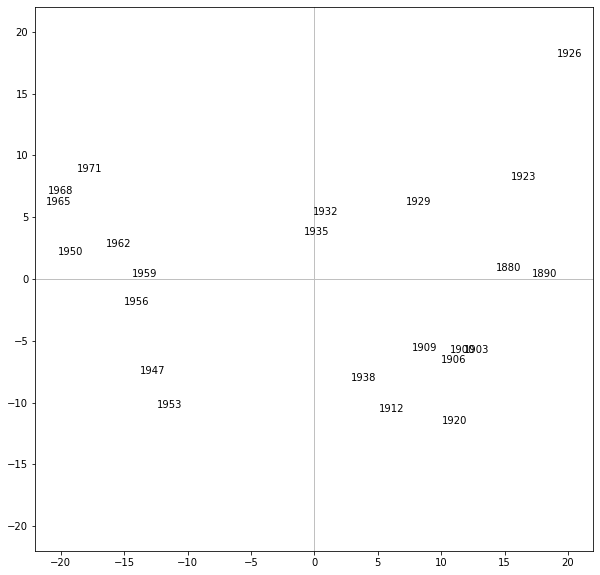

In [52]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(10,10))
axes.set_xlim(-22,22) #même limites en abscisse
axes.set_ylim(-22,22) #et en ordonnée

#placement des étiquettes des observations
for i in range(n):
    plt.annotate(X.index[i],(coordX[i,0],coordX[i,1]))
    
#ajouter les axes
plt.plot([-26,26],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-26,26],color='silver',linestyle='-',linewidth=1)
plt.show()

<span>&#9999;</span> Donner des exemples d'années très différentes. Pouvez vous déterminer des années qui se ressemblent? 

-**Les années très différentes sont:**

     1953 et 1926
     1920 et 1971
     1956 et 1920 
-**On ne peut pas déterminer les années qui se ressemble car deux individus proche dans
la proche projection ne sont pas forcément proche de base**

### 4.2 Qualité de représentation des individus

Pour pouvoir interpréter la proximité des individus dans la représentation graphique il faut vérifier la qualité de leur représentation. 

La **qualité de représentation de l'individu $i$ sur l’axe $k$** est:
$$qlt_k(e_i)=\cos^2(\theta_{ik})=\frac{coord(ik)^2}{dist(i,gravité)^2}.$$

<span>&#9757;</span> Calculer ces valeurs pour chaque individu pour les 2 premiers axes (on rappelle qu'on a deja calculé le numérateur et le dénominateur précédemment) puis en déduire la qualité de représentation des individus dans le plan. 

<span>&#9999;</span> Donner un exemple d'individu proche sur le plan et qui le sont réellement et un exemple d'individus faussement proches dans le plan.

### 4.3 Contribution des individus aux axes 

Les contributions des individus aux axes permettent d'interpréter les axes en fonction des individus. La **contribution de l'individu $i$ à l'axe $k$** vaut:

$$CTR_{ik}=\frac{coord({ik})^2}{n\times\lambda_k}.$$

<span>&#9757;</span> Calculer ces valeurs pour chaque individu pour les 2 premiers axes.

<span>&#9999;</span> Quelles sont le ou les années qui contribuent le plus aux 2 premiers axes?

## 5. Interprétation: Représentation des variables

### 5.1 Cercle des corrélations

On peut retrouver les vecteurs propres dans l'acp à l'aide de `.components_`. Ces vecteurs propres représentent les coordonnées des nouvelles variables en fonction des anciennes: attention, les facteurs sont en ligne, les variables en colonne.

On veut représentater les anciennes variables dans le plan factoriel. On cherche donc leurs corrélations avec les nouvelles variables et on les représente grâce à ces deux coordonnées grâce à la formule:

$$ Cor(Z_k,V_j)=\frac{\sqrt{\lambda_k}a_{k,j}}{\sqrt{Var(V_j)}} $$





<span>&#9757;</span> Faire un tableau `corvar` qui donne $$Cor(V_j,Z_k).$$

Si on se concentre uniquement sur les 2 premiers axes on peut visualiser ces correlations de façon suivante:

In [40]:
pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]})

NameError: name 'corvar' is not defined

Pour représenter les variables on peut alors utiliser le script suivant:

In [ ]:

#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

#affichage des étiquettes (noms des variables)
for j in range(p):
    plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

<span>&#9999;</span> Peut-on immédiatement conclure à la liaision/indépendance linéaire de certaines variables?

### 5.2 Qualité de représentation des variables

On rappelle que plus les variables sont proches du cercle, plus elles sont bien représentées. Vérifions cela par le calcul. La **qualité de représentation d'une variable** est simplement sa corrélation avec l'axe au carré:

<span>&#9999;</span> A l'aide du script suivant, quelles sont les variables bien/mal représentées? Par conséquents quelles sont les variables linéairement liées/indépendantes?


In [ ]:
#cosinus carré des variables
cos2var = corvar**2
pd.DataFrame({'id':X.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]})

### 5.3 Contribution des variables aux axes

De même la **contribution de la variable $j$ à l'axe $k$** s'exprime de la façon suivante:

$$Contr(k,j)=\frac{Cor(Z_k,V_j)}{\lambda_k}.$$

<span>&#9757;</span> Faire un tableau `ctrvar` qui donne $Contr(j,k)$.

<span>&#9999;</span> Quelles sont les variables qui expliquent l'axe 1? l'axe 2? Est-ce que c'est cohérent avec la représentation graphique?

<span>&#9999;</span> Faites une conclusion générale sur cette ACP

## Compléments (au choix)

Refaire l'ACP mais sur les données réduites cette fois. Qu'est-ce qui change?

Refaire une ACP sur les données quantitatives de votre choix

Explorer la toile pour trouver de bien plus belles représentations graphiques de l'ACP.
